In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu as mwu
import seaborn as sns
import datetime


In [29]:
data = pd.read_csv("anon-data/participants.csv")
control = pd.read_csv("anon-data/control.txt", names=["id"])
experimental = pd.read_csv("anon-data/experimental.txt", names=["id"])

In [30]:
control_list = [x[0] for x in control.values.tolist()]
experimental_list = [x[0] for x in experimental.values.tolist()]

In [31]:
data_control = data[data["id"].isin(control_list)].drop('id', axis=1)
data_experimental = data[data["id"].isin(experimental_list)].drop('id', axis=1)

In [32]:
def secs_to_mmss(secs):
    return str(datetime.timedelta(seconds=round(secs)))[2:]

def get_mean_std_mwu(ctrl, exp, colname, convert_time=False):
    ctrl_vals = ctrl[colname]
    exp_vals = exp[colname]

    avg_ctrl = ctrl_vals.mean()
    avg_exp = exp_vals.mean()

    std_ctrl = ctrl_vals.std()
    std_exp = exp_vals.std()

    if convert_time:
        avg_ctrl = secs_to_mmss(avg_ctrl)
        avg_exp = secs_to_mmss(avg_exp)

        std_ctrl = secs_to_mmss(std_ctrl)
        std_exp = secs_to_mmss(std_exp)

    mwu_result = mwu(ctrl_vals, exp_vals)

    return (avg_ctrl, std_ctrl, avg_exp, std_exp, mwu_result[0], mwu_result[1])


In [33]:
colnames = ["Total Duration (Task 1)", 
            "Total Duration (Task 2)", 
            "Total Duration (Task 3)", 
            "Context Switches (Task 1)", 
            "Context Switches (Task 2)", 
            "Context Switches (Task 3)"]

for i in colnames[:3]:
    print(get_mean_std_mwu(data_control, data_experimental, i, True))

for i in colnames[3:]:
    print(get_mean_std_mwu(data_control, data_experimental, i))

('16:02', '07:46', '10:53', '03:52', 9.0, 0.4)
('11:02', '06:03', '06:13', '01:51', 11.0, 0.11428571428571428)
('05:47', '03:06', '05:29', '02:56', 7.0, 0.8571428571428571)
(44.0, 25.099800796022265, 9.0, 6.0, 11.0, 0.11428571428571428)
(26.0, 10.98483803552272, 7.333333333333333, 3.214550253664318, 12.0, 0.05714285714285714)
(18.5, 10.246950765959598, 4.0, 2.0, 11.0, 0.11428571428571428)


In [34]:
def to_snake(text):
    no_spaces = text.replace(' ', '_') if ' ' in text else text
    return no_spaces.lower() 

def plot_context(ctrl, exp, context, y_axis="Time (seconds)"):
    ctrl_with_group = ctrl.assign(group = ["control"] * len(ctrl))
    exp_with_group = exp.assign(group = ["experimental"] * len(exp))

    merged_data = pd.concat([ctrl_with_group, exp_with_group])

    cols = [f"{context} (Task 1)",
            f"{context} (Task 2)",
            f"{context} (Task 3)",
            "group"]

    subset = merged_data[cols]

    new_df_elems = []

    for _, row in subset.iterrows():
        time_task_1 = row[f"{context} (Task 1)"]
        time_task_2 = row[f"{context} (Task 2)"]
        time_task_3 = row[f"{context} (Task 3)"]

        new_df_elems.append([time_task_1, 1, row["group"]])
        new_df_elems.append([time_task_2, 2, row["group"]])
        new_df_elems.append([time_task_3, 3, row["group"]])

    new_df = pd.DataFrame(new_df_elems, columns=[y_axis, "Task", "Group"])

    sns.boxplot(y=y_axis, x='Task', data=new_df, hue='Group')
    plt.title(context)
    processed_context = to_snake(context)
    plt.savefig(f"images/context_{processed_context}.svg")
    plt.show()  

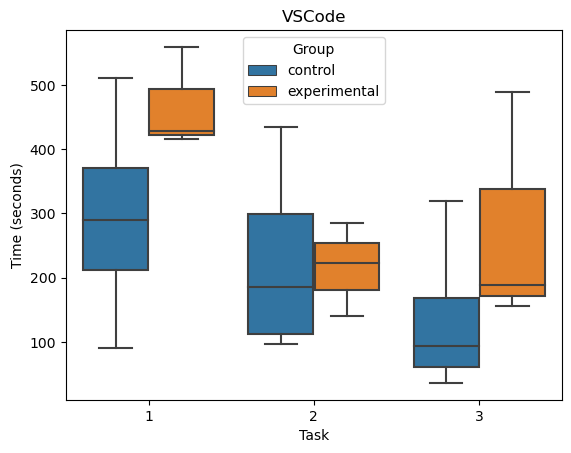

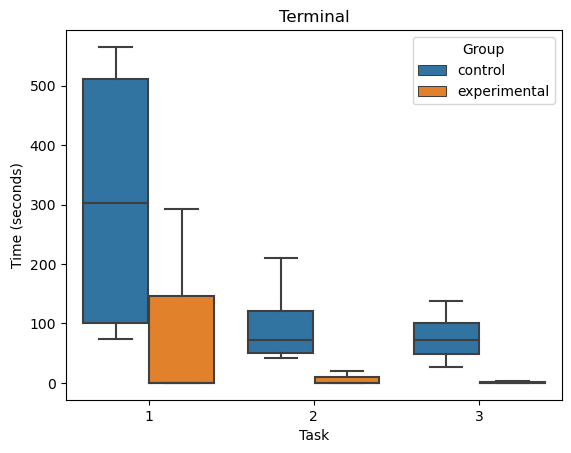

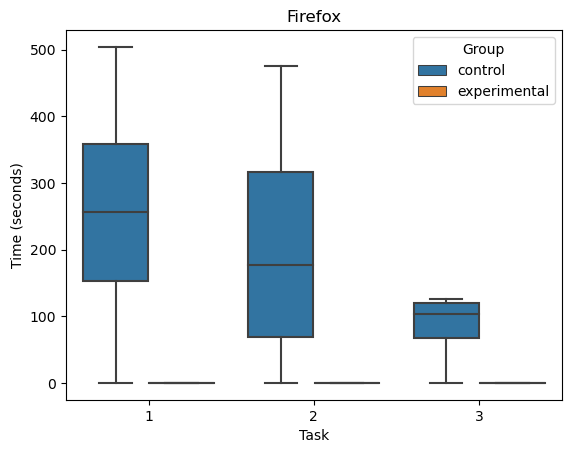

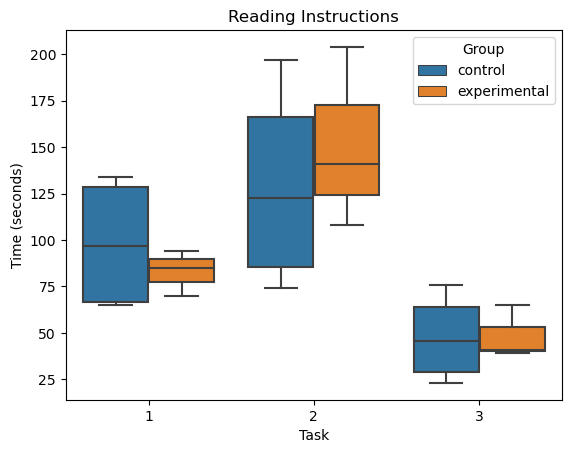

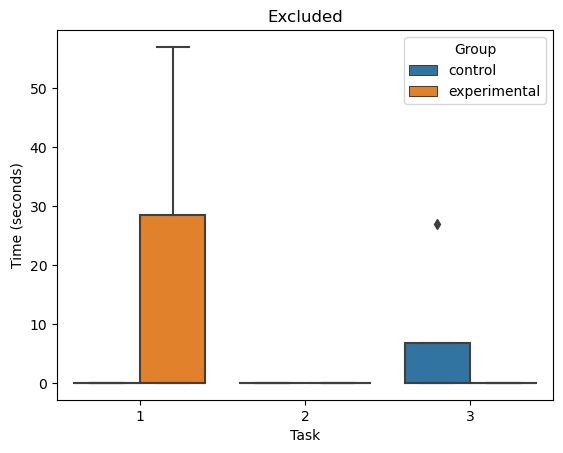

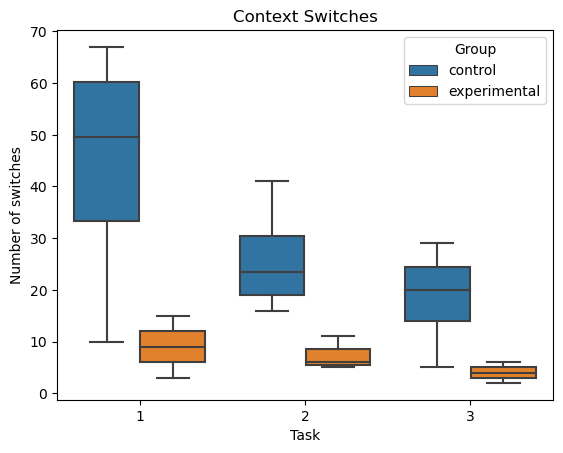

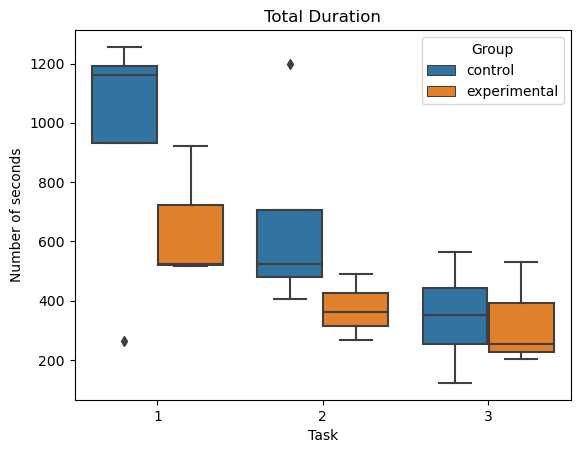

In [35]:
contexts = ["VSCode", "Terminal", "Firefox", "Reading Instructions", "Excluded"]

for i in contexts:
    plot_context(data_control, data_experimental, i)

plot_context(data_control, data_experimental, "Context Switches", "Number of switches")
plot_context(data_control, data_experimental, "Total Duration", "Number of seconds")